In [1]:
from sklearn.externals import joblib

In [2]:
from skimage.feature import hog

In [3]:

from sklearn import svm
from sklearn import model_selection

In [4]:
from sklearn import preprocessing

In [5]:
import numpy as np
#from collections import Counter

In [6]:
import matplotlib.pyplot as plt

In [7]:
import cv2

In [8]:
import pandas as pd
import glob
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
df=pd.read_csv('/home/raj/Downloads/Labelbox.io_personality.csv')

In [11]:
df

,ID,Labeled Data,Label,Created By,Project Name,Seconds to Label,External ID
0,cjdvp9kbs5jhr0198bgqfnhaj,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,28.388,1en.jpg
1,cjdvp9ut17jhr01693k4nbus5,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,11.163,2en.jpg
2,cjdvpa3pw4nfk0120c5iahx4h,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,8.871,3en.jpg
3,cjdvpabrx7b4m0117sryd6n60,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,8.489,4en.jpg
4,cjdvpaingoq9t0194bvdhbe8l,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.141,5en.jpg
5,cjdvpapbijz7t0194zu51gupl,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.798,6en.jpg
6,cjdvpawmzgmug0177ix4lzo65,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.587,7en.jpg
7,cjdvpb2fsgmvt01772d66hn4s,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.668,8en.jpg
8,cjdvpb8n04j3v0116xg2ar6x7,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.228,9en.jpg
9,cjdvpbeio4nti0120tovhjtoz,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.780,10en.jpg


In [12]:
columns=['Id','Image','Label','creater','project_name','time','File_Name']

In [14]:
df.columns=columns

In [15]:
df

,Id,Image,Label,creater,project_name,time,File_Name
0,cjdvp9kbs5jhr0198bgqfnhaj,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,28.388,1en.jpg
1,cjdvp9ut17jhr01693k4nbus5,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,11.163,2en.jpg
2,cjdvpa3pw4nfk0120c5iahx4h,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,8.871,3en.jpg
3,cjdvpabrx7b4m0117sryd6n60,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,8.489,4en.jpg
4,cjdvpaingoq9t0194bvdhbe8l,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.141,5en.jpg
5,cjdvpapbijz7t0194zu51gupl,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.798,6en.jpg
6,cjdvpawmzgmug0177ix4lzo65,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.587,7en.jpg
7,cjdvpb2fsgmvt01772d66hn4s,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.668,8en.jpg
8,cjdvpb8n04j3v0116xg2ar6x7,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,6.228,9en.jpg
9,cjdvpbeio4nti0120tovhjtoz,https://firebasestorage.googleapis.com/v0/b/la...,Energetic Trait,Happy Singh,personality Analysis,5.780,10en.jpg


In [12]:
length=len(df.Image)

In [13]:
filelist=[]
myfile=glob.glob('/home/raj/Downloads/personality/*.jpg')

In [14]:
for i in myfile:
    
    imageL=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    image=cv2.resize(imageL,(200,50),interpolation=cv2.INTER_AREA)
    
    filelist.append(image)
    

In [15]:
label=np.array(df.Label)

In [16]:
label

array(['Energetic Trait', 'Energetic Trait', 'Energetic Trait',
       'Energetic Trait', 'Energetic Trait', 'Energetic Trait',
       'Energetic Trait', 'Energetic Trait', 'Energetic Trait',
       'Energetic Trait', 'Extrovert Trait', 'Extrovert Trait',
       'Extrovert Trait', 'Extrovert Trait', 'Extrovert Trait',
       'Extrovert Trait', 'Extrovert Trait', 'Extrovert Trait',
       'Extrovert Trait', 'Sloppy Trait', 'Extrovert Trait',
       'Extrovert Trait', 'Introvert Trait', 'Introvert Trait',
       'Introvert Trait', 'Optimistic Trait', 'Optimistic Trait',
       'Introvert Trait', 'Introvert Trait', 'Introvert Trait',
       'Sloppy Trait', 'Sloppy Trait', 'Introvert Trait', 'Sloppy Trait',
       'Optimistic Trait', 'Optimistic Trait', 'Optimistic Trait',
       'Optimistic Trait', 'Optimistic Trait', 'Sloppy Trait',
       'Sloppy Trait', 'Sloppy Trait', 'Sloppy Trait', 'Sloppy Trait',
       'Extrovert Trait'], dtype=object)

In [17]:
ImageFeatures=np.array(filelist,'float64')

In [18]:
ImageFeatures.ndim

3

In [19]:
ImageFeatures.shape

(45, 50, 200)

In [20]:
ImageFeatures

array([[[ 111.,  110.,  109., ...,   92.,   93.,   93.],
        [ 110.,  112.,  111., ...,   92.,   94.,   94.],
        [ 109.,  111.,  111., ...,   93.,   93.,   94.],
        ..., 
        [ 111.,  108.,  107., ...,   93.,   92.,   92.],
        [ 112.,  109.,  108., ...,   92.,   91.,   92.],
        [ 112.,  110.,  107., ...,   92.,   92.,   90.]],

       [[  95.,   96.,   96., ...,   90.,   90.,   89.],
        [  98.,   97.,   98., ...,   89.,   90.,   88.],
        [  98.,   98.,   97., ...,   89.,   90.,   88.],
        ..., 
        [  96.,   95.,   95., ...,   74.,   74.,   73.],
        [  95.,   95.,   94., ...,   77.,   74.,   74.],
        [  96.,   93.,   93., ...,   73.,   72.,   73.]],

       [[  90.,   91.,   92., ...,   79.,   80.,   79.],
        [  91.,   91.,   90., ...,   81.,   79.,   78.],
        [  90.,   92.,   89., ...,   82.,   80.,   79.],
        ..., 
        [  93.,   93.,   92., ...,   85.,   84.,   85.],
        [  93.,   93.,   93., ...,   84., 

In [21]:
num_pixel=ImageFeatures.shape[1]*ImageFeatures.shape[2]

In [22]:
ImageFeatures=ImageFeatures.reshape(ImageFeatures.shape[0],num_pixel).astype('float64')

In [23]:
ImageFeatures

array([[ 111.,  110.,  109., ...,   92.,   92.,   90.],
       [  95.,   96.,   96., ...,   73.,   72.,   73.],
       [  90.,   91.,   92., ...,   85.,   85.,   86.],
       ..., 
       [  98.,   99.,   97., ...,   93.,   92.,   91.],
       [ 109.,  112.,  111., ...,  101.,  101.,   99.],
       [  94.,   93.,   94., ...,   89.,   89.,   87.]])

In [24]:
ImageFeatures=ImageFeatures/255.0

In [25]:
ImageFeatures.ndim

2

In [26]:
ImageFeatures.shape

(45, 10000)

In [27]:
ImageFeatures

array([[ 0.43529412,  0.43137255,  0.42745098, ...,  0.36078431,
         0.36078431,  0.35294118],
       [ 0.37254902,  0.37647059,  0.37647059, ...,  0.28627451,
         0.28235294,  0.28627451],
       [ 0.35294118,  0.35686275,  0.36078431, ...,  0.33333333,
         0.33333333,  0.3372549 ],
       ..., 
       [ 0.38431373,  0.38823529,  0.38039216, ...,  0.36470588,
         0.36078431,  0.35686275],
       [ 0.42745098,  0.43921569,  0.43529412, ...,  0.39607843,
         0.39607843,  0.38823529],
       [ 0.36862745,  0.36470588,  0.36862745, ...,  0.34901961,
         0.34901961,  0.34117647]])

In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(ImageFeatures,label,test_size=0.1)

In [29]:
list_hog_fd = []
for feature in X_train:
    fd = hog(feature.reshape((200, 50)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [30]:
pp = preprocessing.StandardScaler().fit(hog_features)
hog_features = pp.transform(hog_features)

In [31]:
#clf = LinearSVC()
clf = svm.SVC(gamma=0.1, kernel='poly')
# Perform the training
clf.fit(hog_features,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
joblib.dump((clf, pp), "characters_cls.pkl", compress=3)

['characters_cls.pkl']

In [33]:
list_hog_fd2 = []
for feature in X_test:
    fd = hog(feature.reshape((200, 50)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd2.append(fd)
hog_features2 = np.array(list_hog_fd2, 'float64')

In [34]:
pp = preprocessing.StandardScaler().fit(hog_features2)
hog_features2 = pp.transform(hog_features2)

In [35]:
#Calculating accuracy of the trained classifier
testclassifier=clf.score(hog_features2,y_test)


In [36]:
predictclassifier=clf.predict(hog_features2)

In [37]:
accuracy=accuracy_score(y_test,predictclassifier)

In [38]:
accuracy

0.20000000000000001

In [39]:
testclassifier

0.20000000000000001

In [40]:
predictclassifier

array(['Extrovert Trait', 'Extrovert Trait', 'Extrovert Trait',
       'Extrovert Trait', 'Extrovert Trait'], dtype=object)

In [41]:
conf_mat = confusion_matrix(y_test,predictclassifier)

In [42]:
conf_mat

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

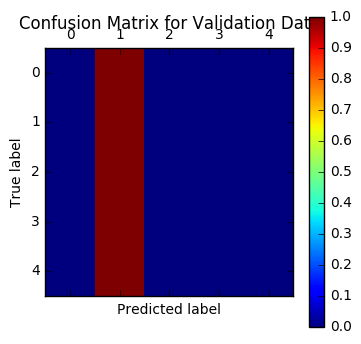

In [43]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
# Read the input image 
photo="ANKIT.jpeg"
im = cv2.imread(photo)

# Convert to grayscale and apply Gaussian filtering
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)


In [45]:
%matplotlib inline

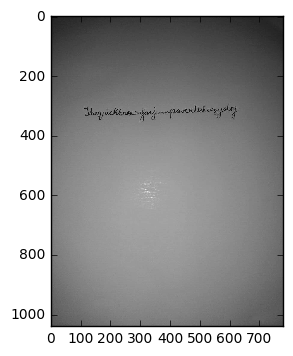

In [46]:
plt.imshow(im, interpolation='nearest',cmap='gray')

In [47]:
im = cv2.GaussianBlur(im, (5, 5), 0)

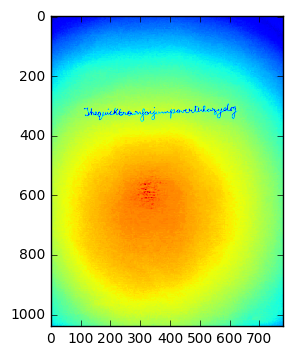

In [48]:
plt.imshow(im)

In [49]:
# Threshold the image
#ret,im_th = cv2.threshold(im, 15, 255, 0)
#ret,im_th = cv2.threshold(im, 40, 255, 0)

In [50]:
im_th = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

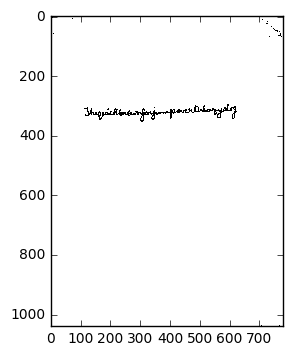

In [51]:
plt.imshow(im_th,interpolation='nearest',cmap='gray')

In [52]:

# Find contours in the image
im2,ctrs, _ = cv2.findContours(im_th, 1, 2)

listctr=[]

In [53]:
len(ctrs)

67

In [54]:
for crt in ctrs:
    listctr.append(len(crt))

In [55]:
dictlist={}

In [56]:
for i in listctr:
    if i>600:
        dictlist.setdefault(i,listctr.index(i))

In [57]:
dictlist

{1021: 22}

In [58]:
# Get rectangles contains each contour
#rects = [cv2.boundingRect(ctr) for ctr in ctrs]
for key,value in dictlist.iteritems():
    a=dictlist[key]
    rects=[cv2.boundingRect(ctrs[a])]

In [59]:
rects

[(108, 294, 518, 64)]

photo="ANKIT.png"
im = cv2.imread(photo)
plt.imshow(im)

print(rects[1])
x,y, w_, h_ = rects[1]
blah = im[y:y+h_, x:x+w_]
plt.imshow(blah)

In [60]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the character line
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (200, 50), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    roi_hog_fd = pp.transform(np.array([roi_hog_fd],'float64'))
    nbr = clf.predict(roi_hog_fd)
    cv2.putText(im, str(str(nbr[0])), (rect[0],rect[1]),cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), 1)


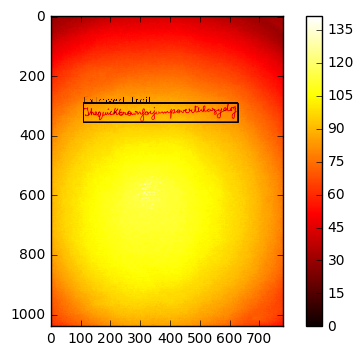

In [61]:
plt.imshow(im,cmap='hot')
plt.colorbar()

In [62]:
cv2.namedWindow("Resulting Image with Rectangular ", cv2.WINDOW_NORMAL)
cv2.imshow("Resulting Image with Rectangular ", im)
cv2.waitKey(0)
cv2.destroyAllWindows()
